<h1>Introduction</h1>


This project calculates and displays statistics for a Thanksgiving survey. 

In [55]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

data=pd.read_csv("thanksgiving.csv", encoding="Latin-1")
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [56]:
data.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [57]:
print(data['Do you celebrate Thanksgiving?'].value_counts())

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64


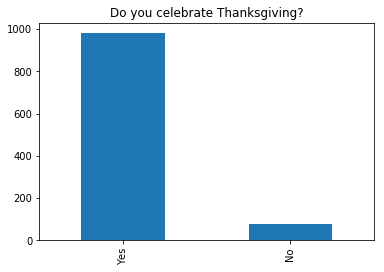

In [58]:
celebrate=data['Do you celebrate Thanksgiving?'].value_counts()
celebrate.plot.bar()
plt.title('Do you celebrate Thanksgiving?')

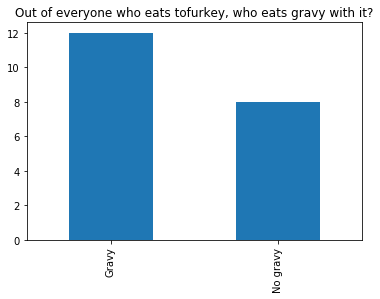

In [59]:
yesdata=data.drop(labels=data[data['Do you celebrate Thanksgiving?']!='Yes'].index)
cat_counts=yesdata['What is typically the main dish at your Thanksgiving dinner?'].value_counts()
tofurky_gravy=yesdata[yesdata['What is typically the main dish at your Thanksgiving dinner?']=='Tofurkey']['Do you typically have gravy?']
ax=tofurky_gravy.value_counts().plot.bar()
ax.set_xticklabels(['Gravy', 'No gravy'])
plt.title("Out of everyone who eats tofurkey, who eats gravy with it?")

<em>Using a bit of pandas selection we got an answer to a specific question.</em>

In [60]:
apple_isnull=yesdata['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple'].isnull()
pumpkin_isnull=yesdata['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin'].isnull()
pecan_isnull=yesdata['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan'].isnull()
ate_pies=(apple_isnull & pumpkin_isnull) & pecan_isnull
yesdata['ate_pies']=ate_pies
#Here we can keep track of everyone who ate at least one pie.
print(yesdata['ate_pies'].value_counts())

False    876
True     104
Name: ate_pies, dtype: int64


In [61]:
len(ate_pies[ate_pies==False])/len(ate_pies)

0.8938775510204081

<h1>Pies Explanation</h1>

This result is a bit misleading because it is actually saying whether or not all three values for pies were null. So in this case, False means that that person ate at least one of the types of pies for Thanksgiving dinner. True means they ate no pie. 89% of people ate pie.

In [62]:
def stringToInt(string):
    if pd.isnull(string)==True:
        return None
    return int(string.split(' ')[0].replace('+', ''))

data['int_age']=data['Age'].apply(stringToInt)
data['int_age'].describe()

count    1025.000000
mean       39.383415
std        15.398493
min        18.000000
25%        30.000000
50%        45.000000
75%        60.000000
max        60.000000
Name: int_age, dtype: float64

<h1>Age Results</h1>

While this is an OK method of determining age, it skews the distribution to the right by only taking into account the first age value. So the mean age determined using this method is younger than the true mean age. Also, there's no account of an age larger than 60, which could counteract the right skew. If more age categories with significant numbers of respondents were included in the survey data, the mean age would be larger. 

In [63]:
def stringToIntIncome(string):
    if pd.isnull(string)==True:
        return None
    split=string.split(' ')[0]
    if split=='Prefer':
        return None
    for ch in ['$', ',']:
        if ch in split:
            split=split.replace(ch, '')
    return int(split)

data['int_income']=data['How much total combined money did' \
                        ' all members of your HOUSEHOLD earn last year?'].apply(stringToIntIncome)

data['int_income'].describe()
              

count       889.000000
mean      74077.615298
std       59360.742902
min           0.000000
25%       25000.000000
50%       50000.000000
75%      100000.000000
max      200000.000000
Name: int_income, dtype: float64

<h1>Income Results</h1>

Similarly to ages, this only taks into account the lower of each two values, so there would be right skew. Also, people that have income 200,000 and up can't bring their enormous outlier wealth into the equation, 
so the values might be smaller than they could be. Also people with household income \$0 to 9999 have to report 0, even if they make more, which does drag down average. Nobody anwering this survey would truly make \$0, unless they're 
entirely dependent on assistance.

In [64]:
underFifteen=data[data['int_income']<150000]

<h6>How far people with households earning less than 150000 will travel</h6>

In [65]:
print(underFifteen['How far will you travel for Thanksgiving?'].value_counts())
overFifteen=data[data['int_income']>150000]

Thanksgiving is happening at my home--I won't travel at all                         281
Thanksgiving is local--it will take place in the town I live in                     203
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    150
Thanksgiving is out of town and far away--I have to drive several hours or fly       55
Name: How far will you travel for Thanksgiving?, dtype: int64


<h6>How far people with households earning more than 150000 will travel</h6>

In [66]:
print(overFifteen['How far will you travel for Thanksgiving?'].value_counts())

Thanksgiving is happening at my home--I won't travel at all                         49
Thanksgiving is local--it will take place in the town I live in                     25
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    16
Thanksgiving is out of town and far away--I have to drive several hours or fly      12
Name: How far will you travel for Thanksgiving?, dtype: int64


Results show that most people regardless of people celebrate Thanksgiving at their home and don't travel at all. Overall, the results breakdown in the same order regardless of income, but a higher proportion of people with richer households will travel further.

<h1>Friendsgiving Results</h1>

In [67]:
data.pivot_table(index="Have you ever tried to meet up with hometown friends on Thanksgiving night?"
     , columns='Have you ever attended a "Friendsgiving?"', values='int_age')

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,42.283702,37.010526
Yes,41.475410,33.976744


In [73]:
data.pivot_table(index="Have you ever tried to meet up with hometown friends on Thanksgiving night?"
     , columns='Have you ever attended a "Friendsgiving?"', values='int_income')

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,78914.549654,72894.736842
Yes,78750.000000,66019.736842


Younger people with less household money are more likely to say they've attended a Friendsgiving and have tried to meet up with hometown friends.

<h1>Black Friday Work</h1>

In [74]:
retailWorkers=data[data['Do you work in retail?']=='Yes']
print(len(retailWorkers))

70


Sample size of 70. Not great, but maybe we can still draw some conclusions.


In [75]:
workingOnBlackFriday=data['Will you employer make you work on Black Friday?'].dropna()
print(workingOnBlackFriday.value_counts())
values=workingOnBlackFriday.value_counts().to_dict()
print('\nProportions Working/Not Working/ Doesn\'t apply on Black Friday')
for key in values:
    prop=values[key]*100/len(retailWorkers)
    print(str(key)+': '+'%.2f' %prop +'%')

Yes              43
No               20
Doesn't apply     7
Name: Will you employer make you work on Black Friday?, dtype: int64

Proportions Working/Not Working/ Doesn't apply on Black Friday
Yes: 61.43%
No: 28.57%
Doesn't apply: 10.00%


Evidently, most people working retail have to work on Black Friday.

<h1>Reigon Proportions</h1>

In [71]:
import numpy as np
unique_regions=pd.unique(data['US Region'].dropna())
print(unique_regions)
region_proportions={}
for region in unique_regions:
    regional_data=data[data['US Region']==region]
    #print(regional_data)
    size=len(regional_data.index)
    print('Size of region '+region+': ' +str(size))
    celebrants=len(regional_data[regional_data['Do you celebrate Thanksgiving?']=='Yes'])
    print('Number of celebrants: '+ str(celebrants))
    region_proportions[region]=str(100*float(str('{:.5f}'.format(celebrants/size))))+'%'
print(region_proportions)

['Middle Atlantic' 'East South Central' 'Mountain' 'Pacific'
 'East North Central' 'West North Central' 'West South Central'
 'South Atlantic' 'New England']
Size of region Middle Atlantic: 159
Number of celebrants: 145
Size of region East South Central: 60
Number of celebrants: 56
Size of region Mountain: 47
Number of celebrants: 41
Size of region Pacific: 146
Number of celebrants: 130
Size of region East North Central: 150
Number of celebrants: 145
Size of region West North Central: 74
Number of celebrants: 71
Size of region West South Central: 91
Number of celebrants: 85
Size of region South Atlantic: 214
Number of celebrants: 203
Size of region New England: 58
Number of celebrants: 55
{'Middle Atlantic': '91.19500000000001%', 'East South Central': '93.333%', 'Mountain': '87.234%', 'Pacific': '89.041%', 'East North Central': '96.667%', 'West North Central': '95.946%', 'West South Central': '93.407%', 'South Atlantic': '94.86%', 'New England': '94.828%'}


The Mountain region of the US had the smallest proportion of Thanksgiving celebrants overall, while East North Central had the highest proportion of Thanksgiving celebrants, differing by about ten percentage points.